In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

In [2]:
train_path = r"C:\Users\Divish\Desktop\ml project\DATASET\TRAIN"
test_path = r"C:\Users\Divish\Desktop\ml project\DATASET\TEST"

In [3]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:17<00:00, 585.84it/s]


In [5]:
data.shape

(22564, 2)

In [6]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\Divish\\Desktop\\ml project\\DATASET\\TRAIN\\O': 12565,
         'C:\\Users\\Divish\\Desktop\\ml project\\DATASET\\TRAIN\\R': 9999})

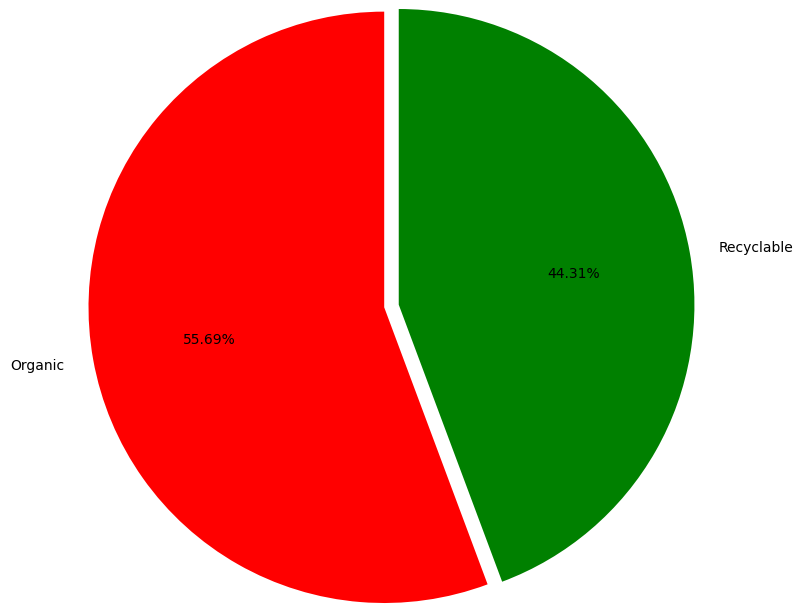

In [7]:
colors = ['Red','Green']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

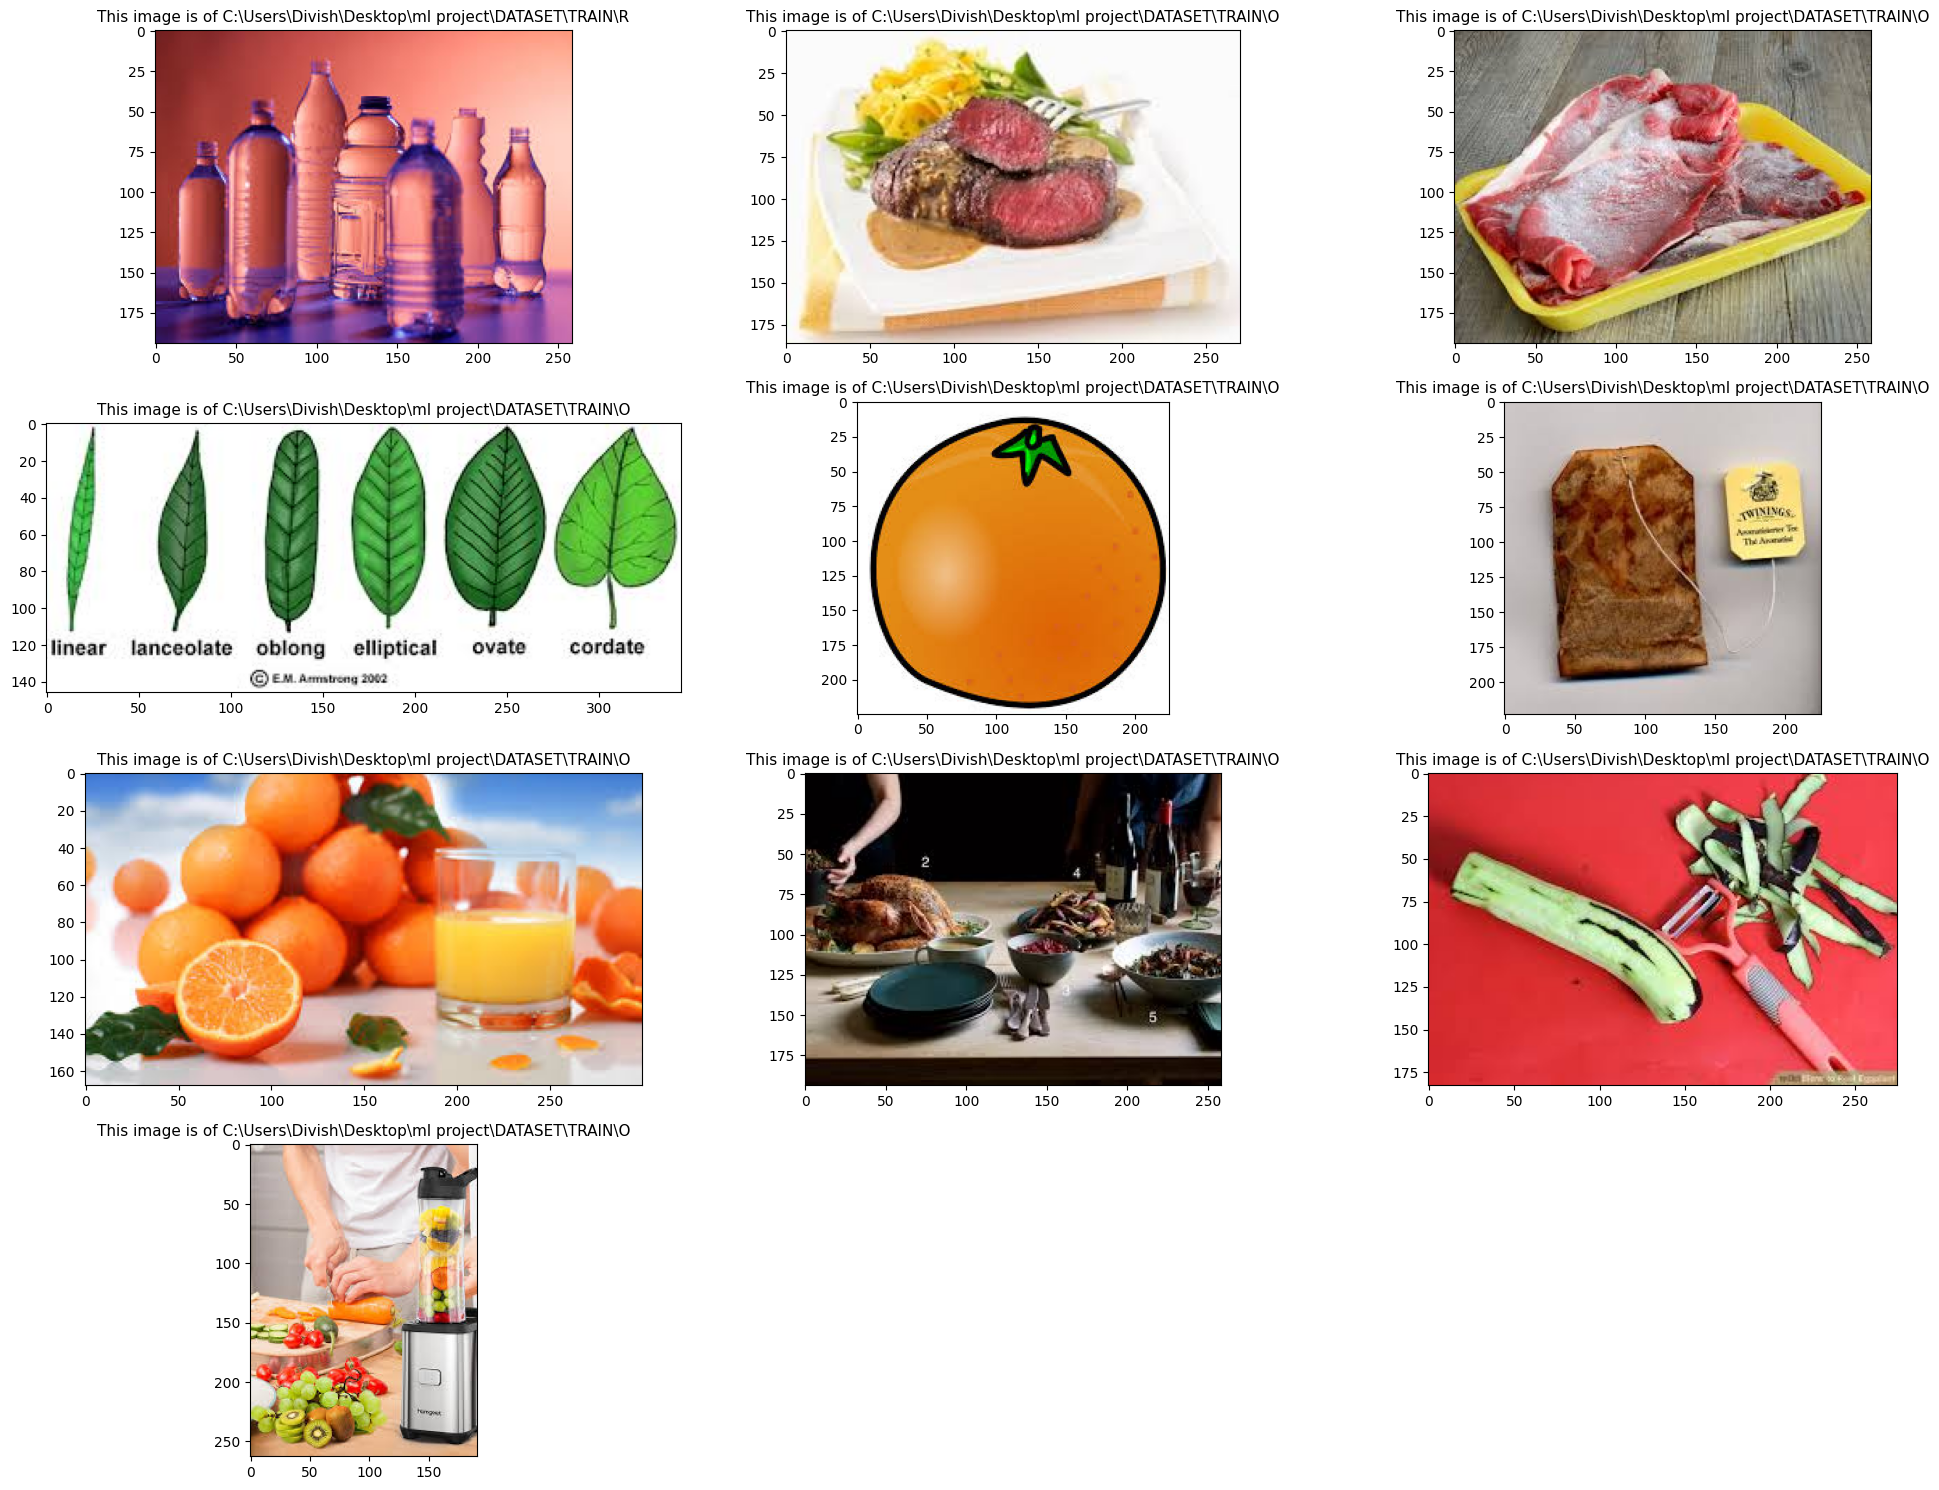

In [8]:
plt.figure(figsize=(20,15))
for i in range(10):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':11})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [9]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (128,128,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [16]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size=(128, 128),  # Smaller image size
    batch_size=batch_size,  # Smaller batch size
    color_mode="rgb",       # Keep RGB if needed
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path, 
    target_size=(128, 128),  # Smaller image size
    batch_size=batch_size,  # Smaller batch size
    color_mode="rgb",
    class_mode="categorical"
)
steps_per_epoch = train_generator.samples // batch_size
validation_steps = test_generator.samples // batch_size

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [19]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 459s 323ms/step - accuracy: 0.7769 - loss: 0.4978 - val_accuracy: 0.8667 - val_loss: 0.3221
Epoch 2/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 478s 339ms/step - accuracy: 0.8419 - loss: 0.3899 - val_accuracy: 0.8544 - val_loss: 0.3297
Epoch 3/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 487s 345ms/step - accuracy: 0.8559 - loss: 0.3634 - val_accuracy: 0.9041 - val_loss: 0.2677
Epoch 4/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 526s 373ms/step - accuracy: 0.8713 - loss: 0.3365 - val_accuracy: 0.8794 - val_loss: 0.3210
Epoch 5/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 471s 334ms/step - accuracy: 0.8727 - loss: 0.3230 - val_accuracy: 0.8842 - val_loss: 0.3046
Epoch 6/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 437s 310ms/step - accuracy: 0.8805 - loss: 0.3125 - val_accuracy: 0.9160 - val_loss: 0.2324
Epoch 7/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 439s 311ms/step - accuracy: 0.8851 - loss: 0.2942 - val_accuracy: 0.9093 - val_loss: 0.2420
Epoch 8/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 445s 315ms/step - ac

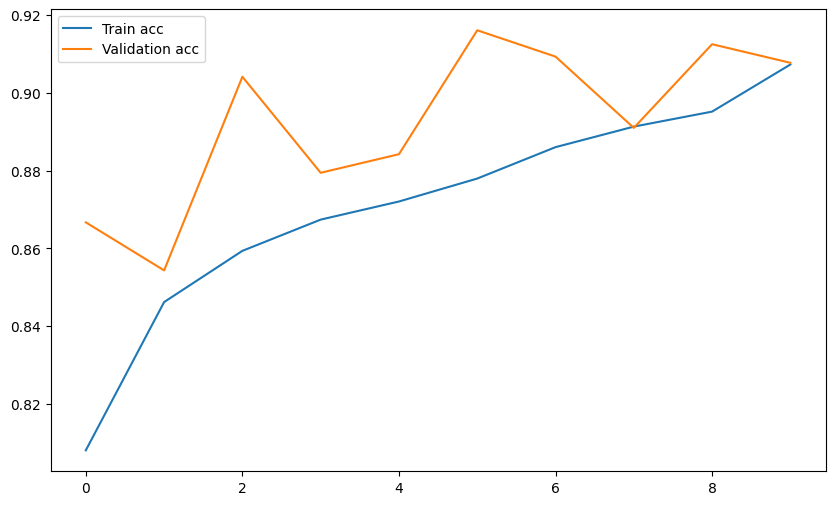

In [20]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

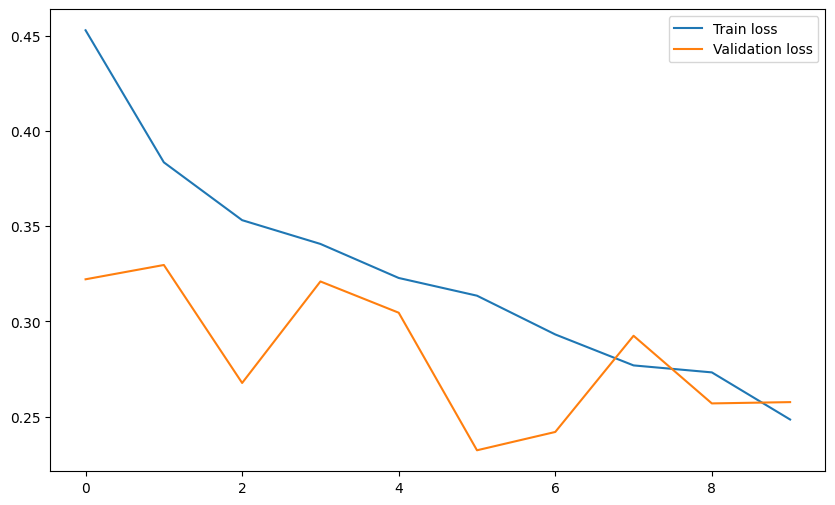

In [21]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [29]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (128, 128))
    img = np.reshape(img, [-1, 128, 128,3])
    result = np.argmax(model.predict(img))
    if result == 1: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==0: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
This image -> Organic


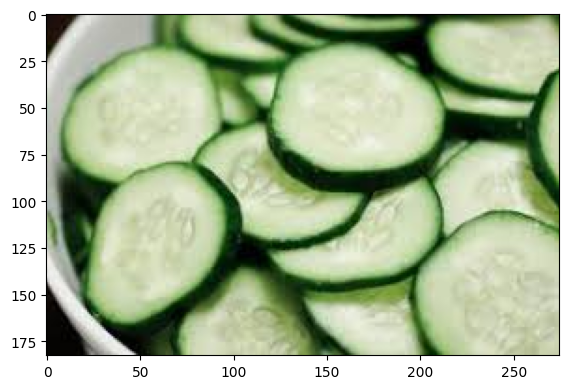

In [30]:
test_img = cv2.imread(r"C:\Users\Divish\Desktop\ml project\DATASET\TEST\O\O_13791.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This image -> Recyclable


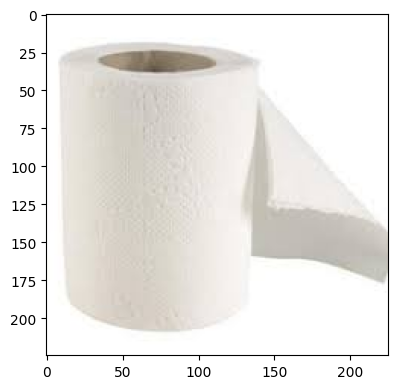

In [31]:
test_img = cv2.imread(r"C:\Users\Divish\Desktop\ml project\DATASET\TEST\R\R_11017.jpg")
predict_func(test_img)